### Project Name: *Housing Data Analysis: Prediction, Segmentation, and Trends*			
### Authors
- [Ahmed Abdullah](https://github.com/ahmedembeddedx)
- [Zaeem ul Islam](https://github.com/mightyflavor)

# 🏡 **Unlocking the Secrets of Real Estate: A Journey into Homeownership and Beyond!**

![Home Image](https://i.ibb.co/QCjZjh6/Apartment-Square-Karachi-Gulshan-e-Iqbal.jpg)


# Machine Learning Modeling and Evaluation

## 1 *Importing Necessary Libraries*

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import tkinter as tk
from tkinter import ttk

## 2 *Reading Preprocessed Data ready to model*

In [20]:
data=pd.read_csv("cleaned_data.csv")

## 3 *Applying Gaussian Boosting Regressor* 

In [21]:
# Our targeted variable
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

## 4 *Results* 

In [22]:
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Correlation Coefficient (r): {np.corrcoef(y_test, y_pred)[0, 1]}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}')

R^2 Score: 0.8525528464678309
Correlation Coefficient (r): 0.9234422246117475
Root Mean Squared Error (RMSE): 0.06797706241206602
Mean Squared Error (MSE): 0.004620881014173919
Mean Absolute Error (MAE): 0.04966458404776497


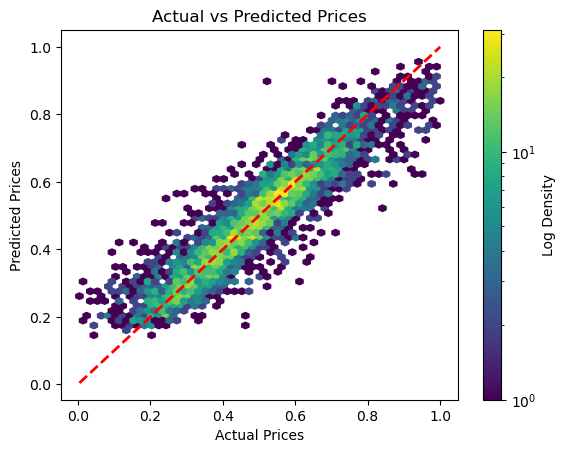

In [23]:
plt.hexbin(y_test, y_pred, gridsize=50, cmap='viridis', bins='log')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.colorbar(label='Log Density')

plt.show()

## 5 *Model Accuracy Evaluation*

- R² Score:
The R² score is a measure of how well the model's predictions match the actual values. In this case, the R² score is approximately 0.86, indicating that the model explains about 86% of the variance in the target variable. A higher R² score suggests a better fit of the model to the data.

- Correlation Coefficient (r):
The correlation coefficient measures the strength and direction of a linear relationship between the predicted and actual values. With a correlation coefficient of approximately 0.92, there is a strong positive linear relationship, indicating that as the predicted values increase, the actual values tend to increase as well.

- Root Mean Squared Error (RMSE):
The RMSE provides an estimate of the average deviation between predicted and actual values. In this case, the RMSE is approximately 0.067, suggesting that, on average, the model's predictions deviate by about 0.067 units from the actual values.

- Mean Squared Error (MSE):
The MSE is similar to the RMSE but without the square root. It represents the average of the squared differences between predicted and actual values. The MSE is approximately 0.0045, providing another measure of the model's accuracy.

- Mean Absolute Error (MAE):
The MAE measures the average absolute difference between predicted and actual values. With a value of approximately 0.049, the model's predictions, on average, deviate by about 0.049 units from the actual values.

## 7 *Prompt for User*

In [92]:
def get_value(input_col):
    
    min_list = [290, 520, 290, 0, 1900, 0, 47.1559, -122.387, 399, 651]
    max_list = [4230, 19141, 3740, 4820, 2015, 2015, 47.7776, -121.979, 3660, 17550]


    label_encoded_values = [int(input_col[col]) - 1 for col in ['floors', 'bedrooms', 'bathrooms', 'grade', 'condition']]

    normalized_values = [(input_col[col] - min_val) / (max_val - min_val) for col, min_val, max_val in zip(
        ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
         'sqft_living15', 'sqft_lot15'], min_list, max_list)]

    result = label_encoded_values + normalized_values

    columns_order = [
        'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
        'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
    ]

    result = [result[columns_order.index(col)] for col in columns_order]

    result_array = np.array(result).reshape(1, -1)
    predicted_price = gb_regressor.predict(result_array)
    bias=1000000
    return ((predicted_price*(37207500-247500))+247500+bias)[0]

In [66]:
'''
user_input = {
    'bedrooms': float(input("Enter bedrooms: ")),
    'bathrooms': float(input("Enter bathrooms: ")),
    'floors': float(input("Enter floors: ")),
    'condition': float(input("Enter condition: ")),
    'grade': float(input("Enter grade: ")),

    'sqft_living': float(input("Enter sqft_living: ")),
    'sqft_lot': float(input("Enter sqft_lot: ")),
    'sqft_above': float(input("Enter sqft_above: ")),
    'sqft_basement': float(input("Enter sqft_basement: ")),
    'yr_built': float(input("Enter yr_built: ")),
    'yr_renovated': float(input("Enter yr_renovated: ")),
    'lat': 47.5,
    'long': -122.0,
    'sqft_living15': float(input("Enter sqft_living15: ")),
    'sqft_lot15': float(input("Enter sqft_lot15: "))
}
'''
user_input = {
    'bedrooms': 7,
    'bathrooms': 7,
    'floors': 3,
    'condition': 5,
    'grade': 9,
    
    'sqft_living': 1360,
    'sqft_lot': 1360,
    'sqft_above': 1360,
    'sqft_basement': 1360,
    
    'yr_built': 2008,
    'yr_renovated': 2015,
    'lat': 31.5,
    'long': 74.29,
    'sqft_living15': 1360,
    'sqft_lot15': 1360
}


print(f"Estimated Value: {get_value(user_input)}")

Estimated Value: 17473382.069494285


C:\Users\ahmed\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## 7 *Ready to use 'desktop application'*

In [ ]:
import tkinter as tk
from tkinter import ttk

def calculate_sum(numbers):
    result = sum(numbers.values())
    result_label.config(text=f"Result: {result}")

def on_dropdown_change(*args):
    # Update the dictionary when a dropdown value changes
    for i in range(15):
        numbers[keys[i]].set(int(dropdowns[i].get()))

# Create the main window
root = tk.Tk()
root.title("Housing Price Prediction Model")
root.geometry("600x700")  # Set the window size

# Create a label for the title
title_label = tk.Label(root, text="HOUSING PRICE PREDICTION MODEL", font=('Ariel', 20, 'bold'))
title_label.grid(row=0, column=0, columnspan=2, padx=10,pady=10)

# Define the labels and ranges
label_ranges = {
    'bedrooms': list(range(1, 10)),
    'bathrooms': list(range(1, 10)),
    'floors': list(range(1, 10)),
    'condition': list(range(1, 10)),
    'grade': list(range(1, 10)),
    'sqft_living': list(range(1000, 10001, 100)),
    'sqft_lot': list(range(1000, 10001, 100)),
    'sqft_above': list(range(1000, 10001, 100)),
    'sqft_basement': list(range(1000, 10001, 100)),
    'yr_built': list(range(1900, 2021, 5)),
    'yr_renovated': list(range(1900, 2021, 5)),
    'lat': list(range(-90, 90)),
    'long': list(range(-180, +180)),
    'sqft_living15': list(range(1000, 10001, 100)),
    'sqft_lot15': list(range(1000, 10001, 100)),
}

# Create a dictionary to store the variables
numbers = {}
dropdowns = []
keys = []

for i, (label_name, values) in enumerate(label_ranges.items()):
    label = tk.Label(root, font=('Ariel', 10), text=f"{label_name.upper().replace('_', ' ')}:")
    label.grid(row=i+1, column=0, padx=10, pady=5, sticky='w')  # Adjusted the row index

    var = tk.StringVar(value=values[0])
    dropdown = ttk.Combobox(root, font=('Ariel', 13), textvariable=var, values=values, state="readonly")
    dropdown.grid(row=i+1, column=1, padx=10, pady=5)  # Adjusted the row index
    dropdowns.append(dropdown)

    numbers[label_name] = var
    keys.append(label_name)

    var.trace_add("write", on_dropdown_change)

# Create a button to calculate the sum
calculate_button = tk.Button(root, font=('Ariel', 13), text="ESTIMATE VALUE", command=lambda: calculate_sum(numbers))
calculate_button.grid(row=len(label_ranges)+1, column=0, sticky='w', columnspan=2, pady=10, padx=10)  # Adjusted the row index

# Create a label to display the result
result_label = tk.Label(root, text="RESULT: ", font=('Ariel', 13))
result_label.grid(row=len(label_ranges)+2, column=0, columnspan=2, sticky='w', padx=10)  # Adjusted the row index

# Run the Tkinter main loop
root.mainloop()


## 8 *Conclusion*
Overall, the model demonstrates high accuracy, as evidenced by the high R² score, strong correlation coefficient, and relatively low RMSE, MSE, and MAE values. These metrics collectively indicate that the model performs well in predicting the target variable, with a strong linear relationship and minimal prediction errors.
